In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import sys
sys.path.insert(0, '../util/')
from util import util

In [2]:
datapath = '/home/jw1624/H1-merian/csvs/breathingModes/'

In [4]:
cdmgals = util.getGalaxies()[0]

In [5]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

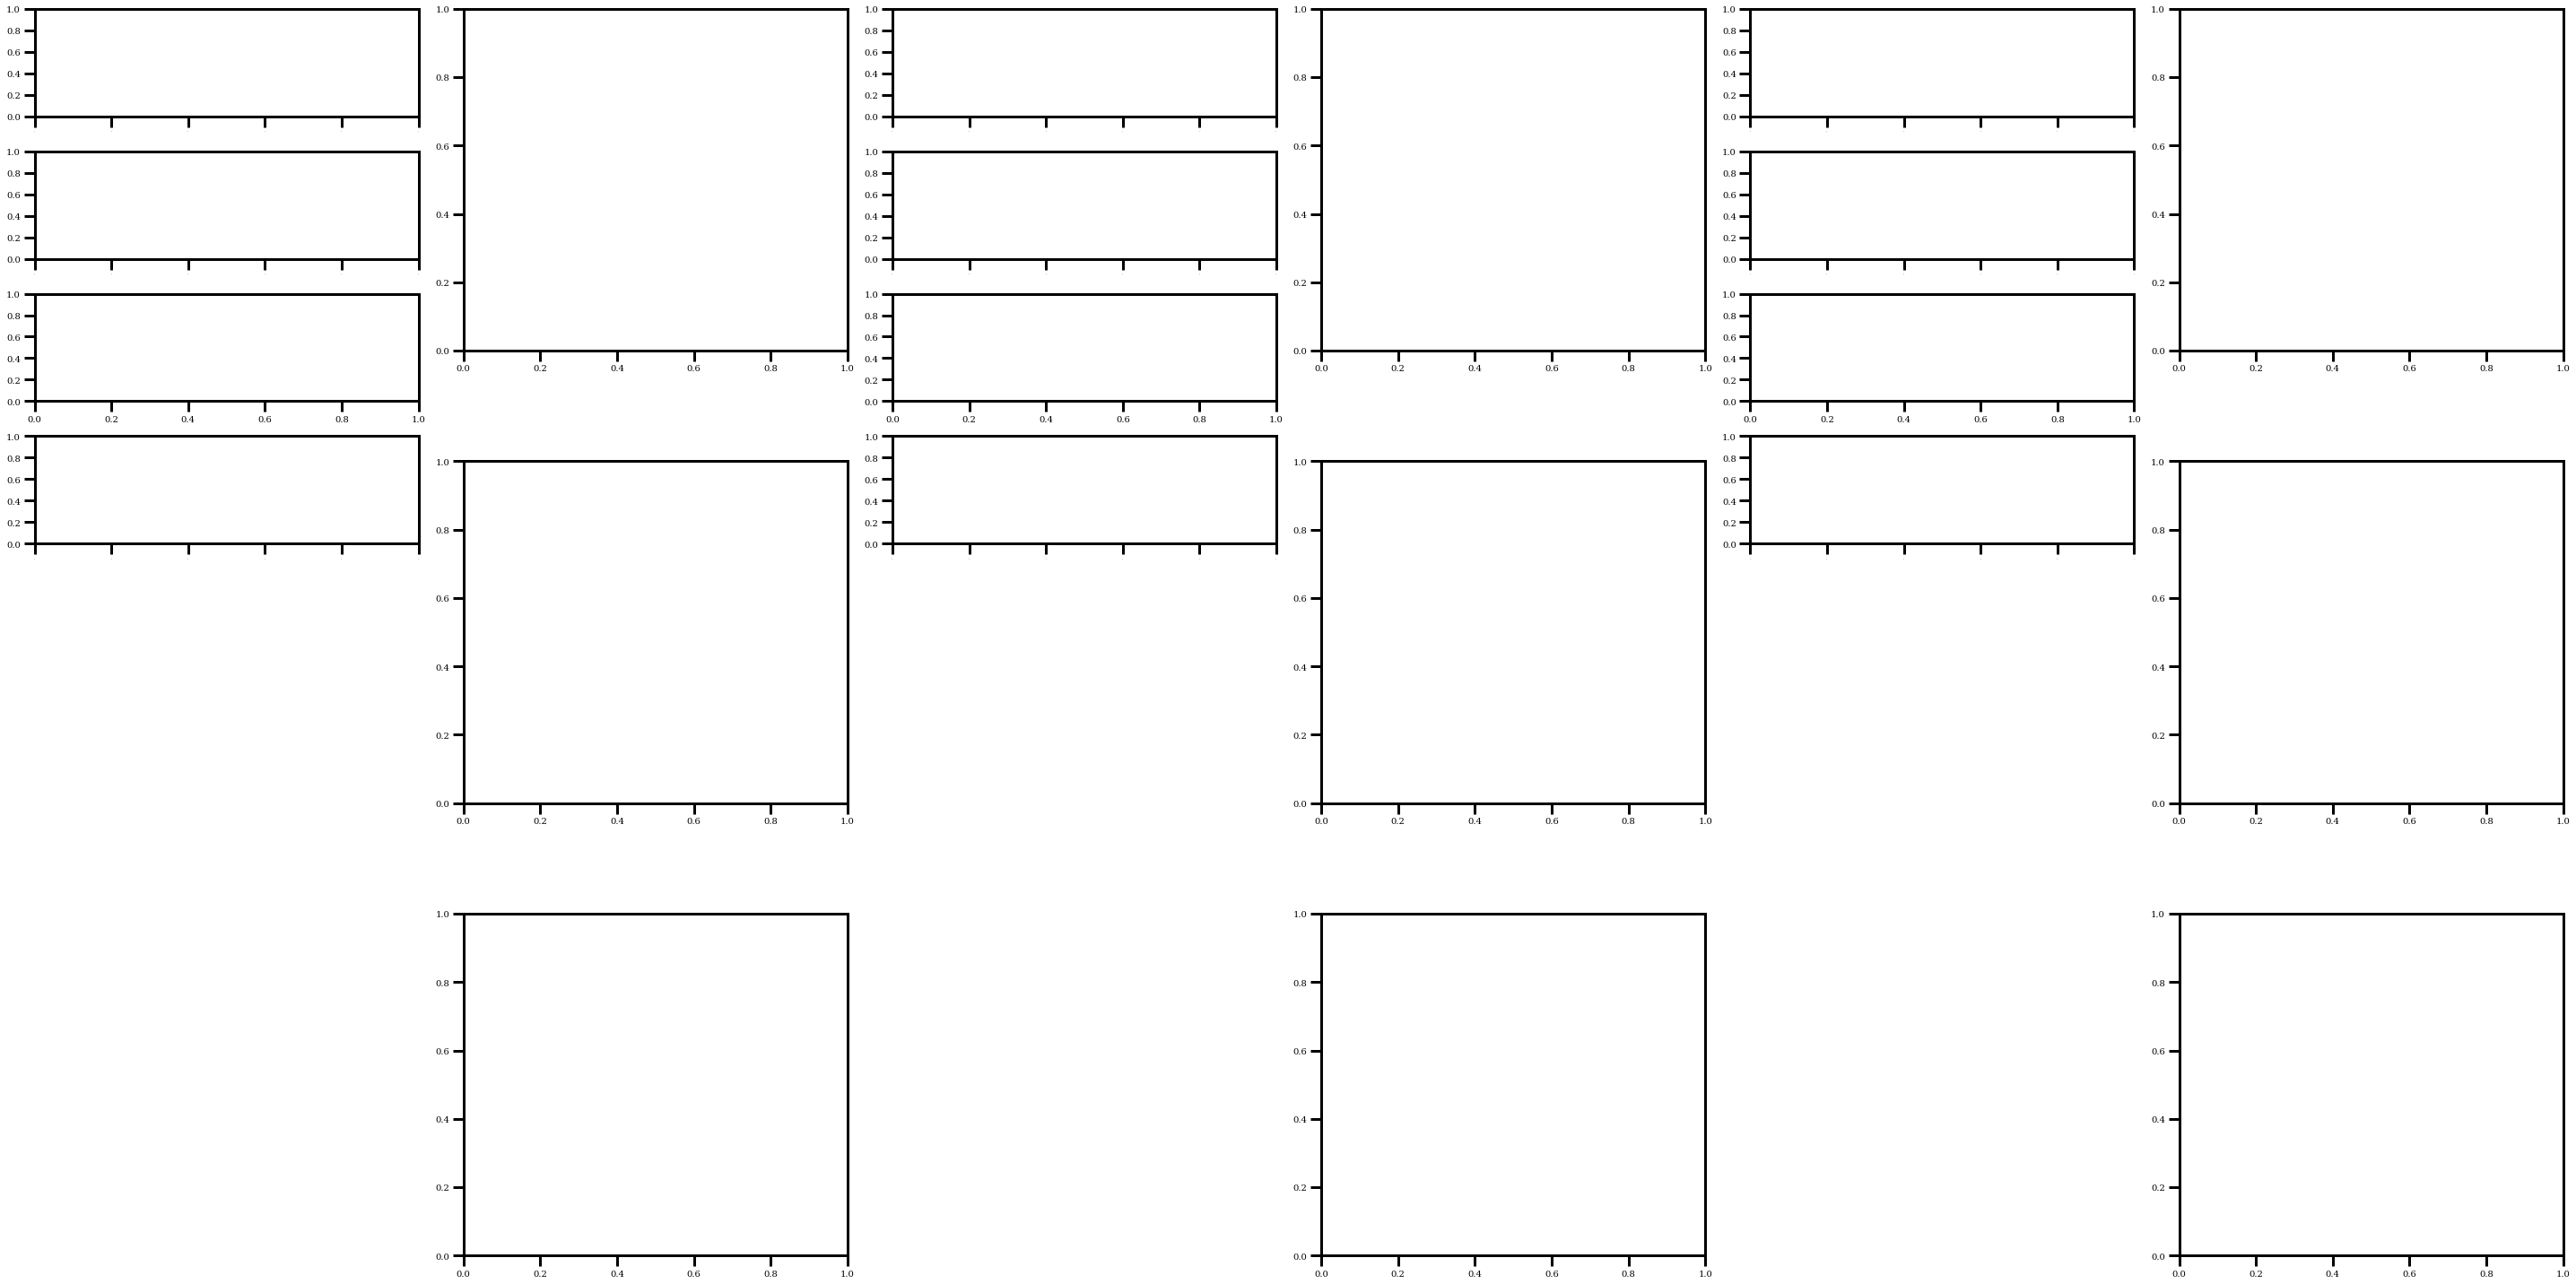

In [46]:
# set up fig
fig = plt.figure(facecolor='w', figsize=(40,20))

sigmaLineAxs = []
ssfrLineAxs = []
RhlLineAxs = []
scatterAxs = []
for i in range(9):
    scatterAxs.append(fig.add_subplot(3,6,2*i+2))
    if i<3:
        RhlLineAxs.append(fig.add_subplot(9,6,2*i+13))
        ssfrLineAxs.append(fig.add_subplot(9,6,2*i+7, sharex=RhlLineAxs[-1]))
        sigmaLineAxs.append(fig.add_subplot(9,6,2*i+1, sharex=RhlLineAxs[-1]))
    elif i<6:
        sigmaLineAxs.append(fig.add_subplot(9,6,2*i+13))
    
    sigmaLineAxs[-1].tick_params(axis='x', which='major', labelsize=0)    
    ssfrLineAxs[-1].tick_params(axis='x', which='major', labelsize=0)
    
plt.tight_layout()

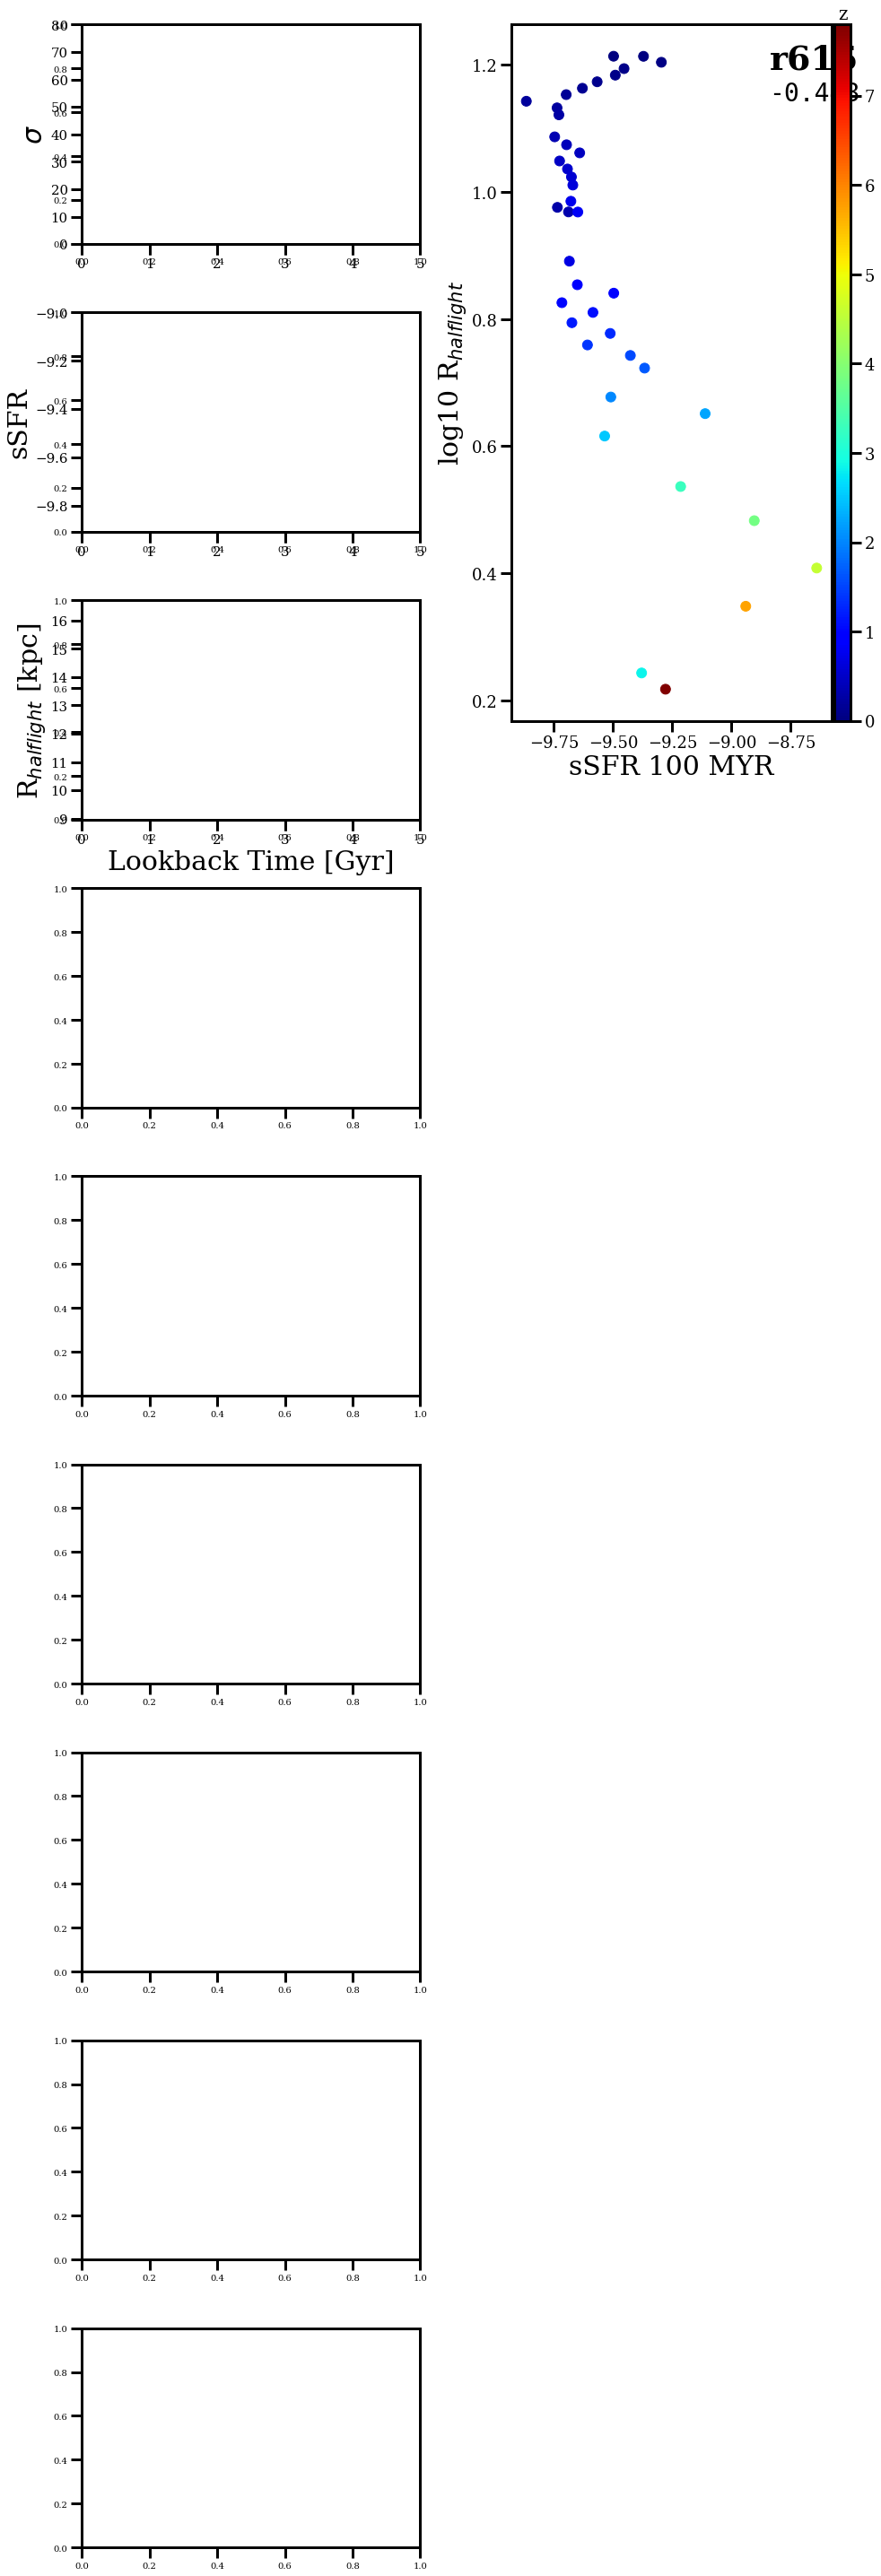

In [15]:
gal = cdmgals[9]
zmax = 10
ymin = -1

tlim = 5

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
tlookback = abs(data['t'] - max(data['t']))
mask = tlookback<tlim

# set up fig
fig = plt.figure(facecolor='w', figsize=(40,40))

ax3 = fig.add_subplot(9,6,13)
ax2 = fig.add_subplot(9,6,7, sharex=ax3)
ax1 = fig.add_subplot(9,6,1, sharex=ax3)

axscatter = fig.add_subplot(3,6,2)

sigmaLineAxs = []
for i in range(9):
    sigmaLineAxs.append(fig.add_subplot(9,6,3*i+1))

    sSFR
    
ax1.tick_params(axis='y', which='major', labelsize=18)
ax2.tick_params(axis='y', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.tick_params(axis='x', which='major', labelsize=0)    
ax2.tick_params(axis='x', which='major', labelsize=0)

axscatter.tick_params(axis='both', which='major', labelsize=18)

## Line plots 
# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigGas = data['sigma_gas'][tlookback<tlim+1]

ax1.plot(tlookback[tlookback<tlim+1], sigStar, linewidth=4, color='firebrick')
ax1.plot(tlookback[tlookback<tlim+1], sigGas, linewidth=4, color='tab:blue')

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_ylabel(r'$\sigma$', fontsize=30)

ax1.legend(['stars', 'gas'], fontsize=16)

ax1.set_xlim([0,tlim])
ax1.set_ylim([0,80])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

ax2.plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=4)
ax2.plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=4)

ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('sSFR', fontsize=30)

ax2.legend(['sSFR 100 MYR', 'sSFR 10 MYR'], fontsize=16)

ax2.set_ylim(top=-9)

# Bottom panel: half-light radius
Rhl = data['R_halflight'][tlookback<tlim+1]

ax3.plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

#axs[2].set_ylim([0,5])
ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_ylabel(r'R$_{halflight}$ [kpc]', fontsize=30)

ax3.set_xlabel('Lookback Time [Gyr]', fontsize=30)

## scatter
x = data['sSFR_100'][data['z'] <= zmax]
y = np.log10(data['R_halflight'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

sc = axscatter.scatter(x, y, c=c, cmap='jet', s=120)

axscatter.set_xlabel('sSFR 100 MYR', fontsize=30)
axscatter.set_ylabel(r'log10 R$_{halflight}$', fontsize=30)

axscatter.text(s='r'+str(gal), x=max(x[x>-20]-0.20), y=max(y)-0.02, fontsize=38, weight='bold')
axscatter.text(s=str(rs)[:6], x=max(x[x>-20]-0.20), y=max(y)-0.07, fontsize=28, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

divider = make_axes_locatable(axscatter)
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()